In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

<IPython.core.display.Javascript object>


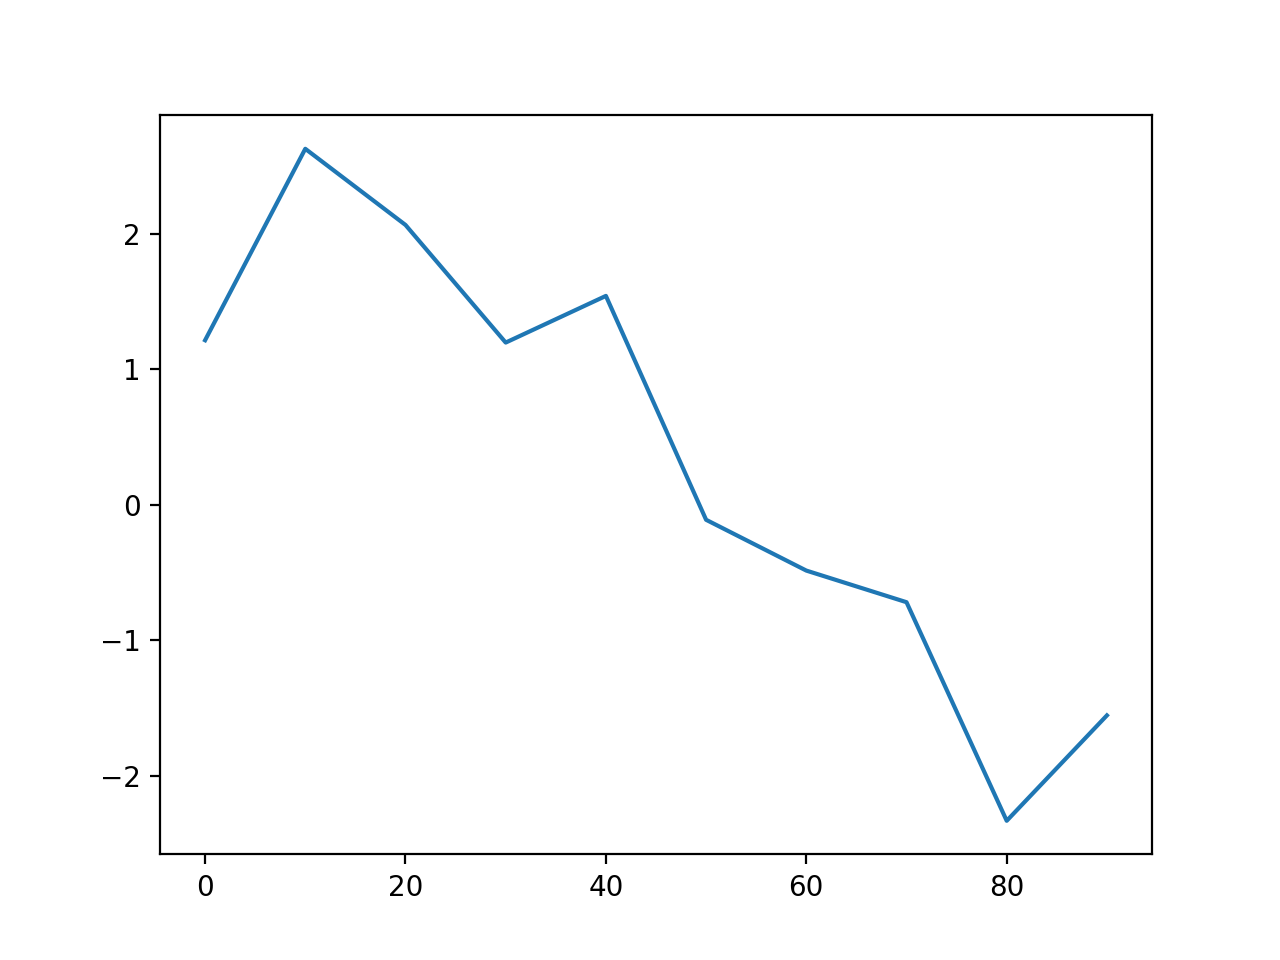

In [3]:
s.plot()

In [4]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.076565,-2.502585,0.248563,-0.357342
10,-0.941607,-2.854418,-1.661498,-0.036017
20,-1.121796,-3.931858,-1.564561,0.751965
30,-1.181486,-2.376035,-1.876946,1.576096
40,-0.034979,-1.403273,-3.243613,2.255057
50,0.337748,-1.974396,-2.864914,1.682050
60,1.314990,-2.546277,-2.701599,3.366532
70,1.935943,-2.261231,-3.207622,5.418739
80,1.775682,-2.078713,-2.936492,5.810579
90,1.921209,-1.055439,-2.386628,5.842206


<IPython.core.display.Javascript object>


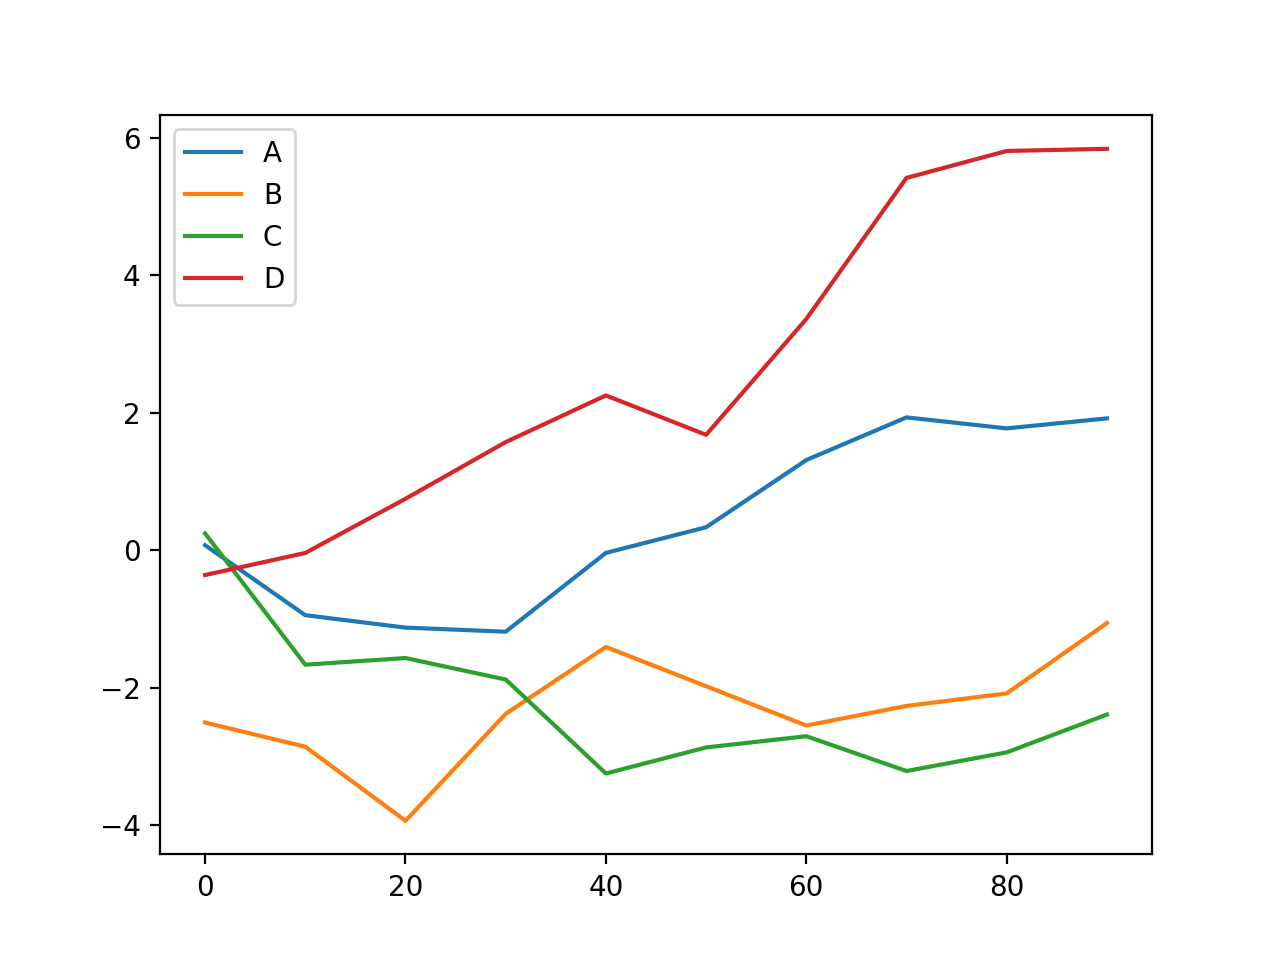

In [5]:
df.plot()

### Bar Plots

<IPython.core.display.Javascript object>


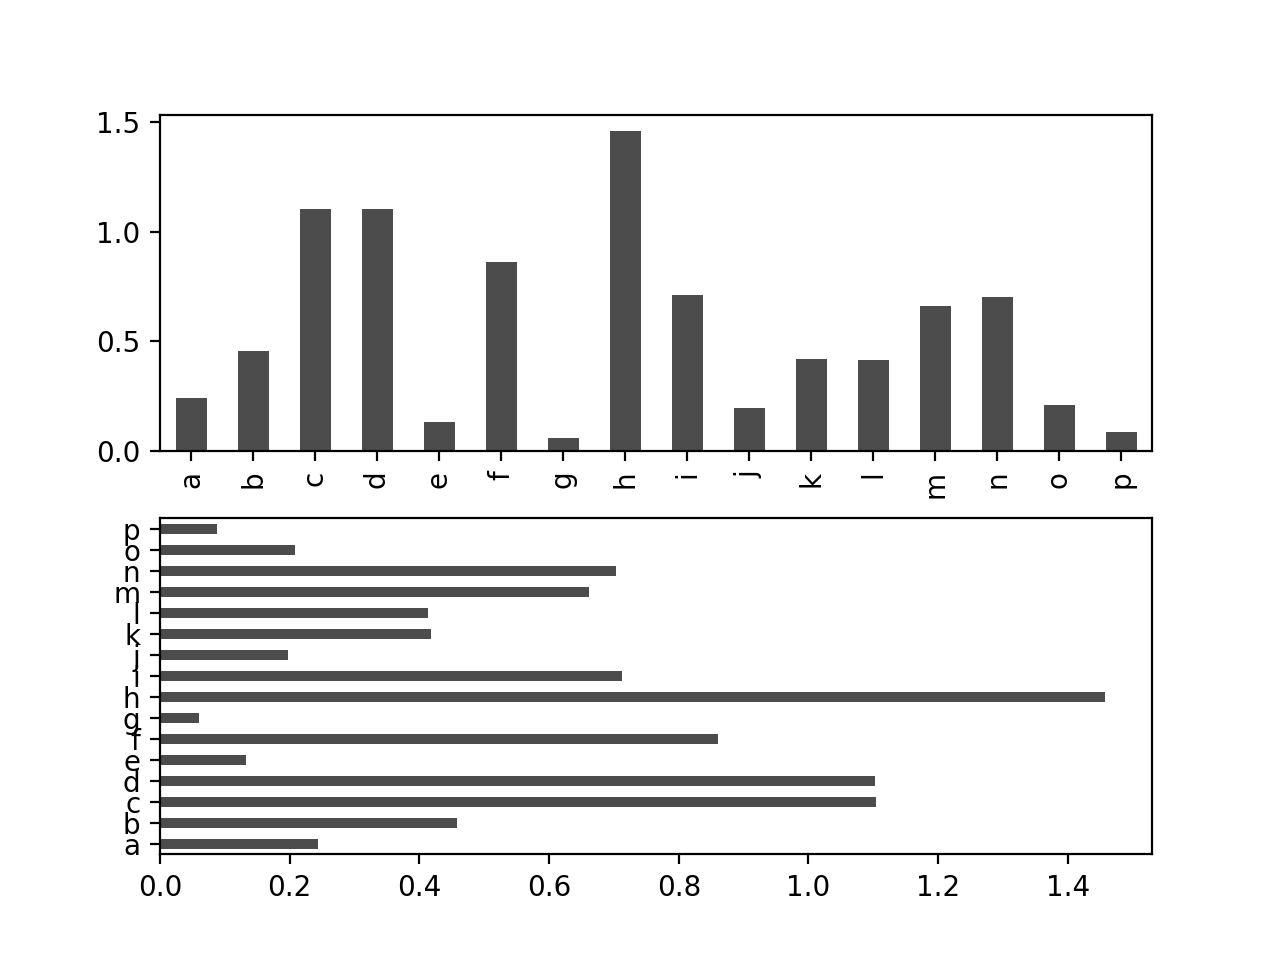

In [6]:
fig, axes = plt.subplots(2, 1)

In [7]:
data = pd.Series(np.abs(np.random.randn(16)), index=list('abcdefghijklmnop'))

In [8]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [9]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [10]:
 df = pd.DataFrame(np.random.rand(6, 4),
                   index=['one', 'two', 'three', 'four', 'five', 'six'],
                   columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.335982,0.365627,0.878435,0.962415
two,0.019819,0.421495,0.581469,0.455958
three,0.305119,0.082817,0.135644,0.304031
four,0.527630,0.260703,0.772539,0.457934
five,0.734336,0.502090,0.305743,0.823474
six,0.750975,0.501453,0.171766,0.444991


<IPython.core.display.Javascript object>


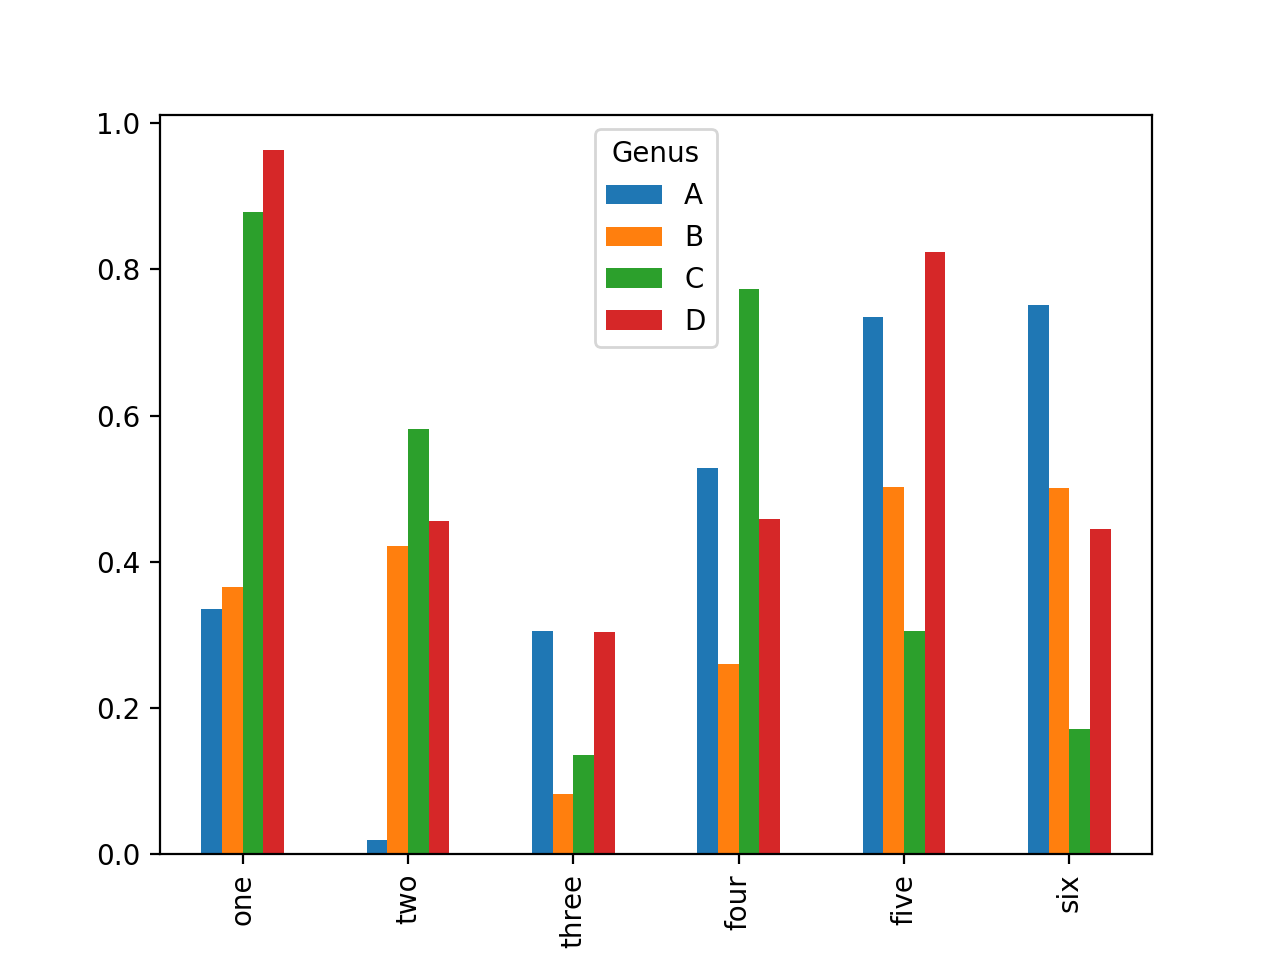

In [11]:
df.plot.bar()

<IPython.core.display.Javascript object>


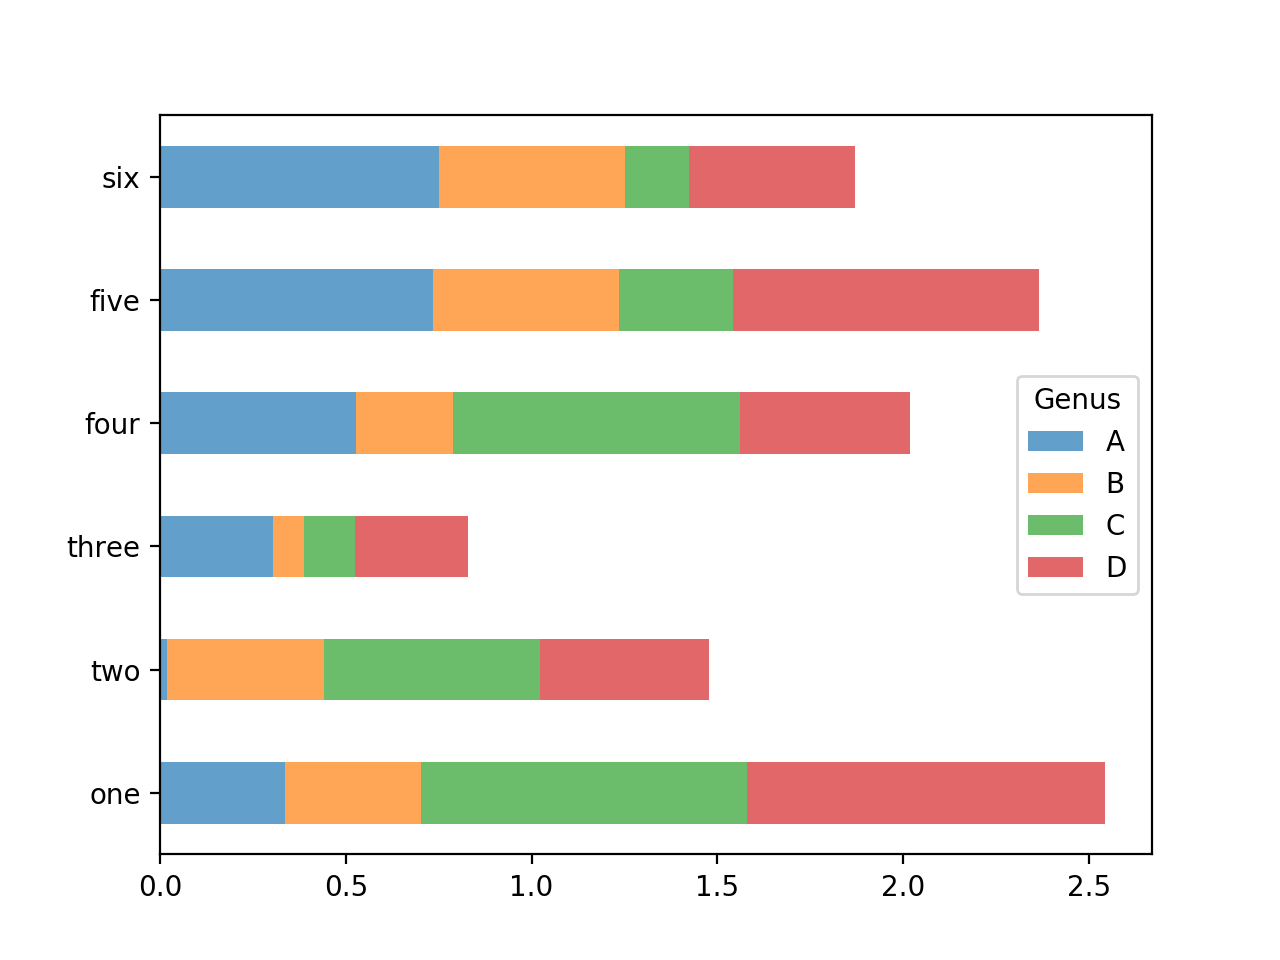

In [12]:
df.plot.barh(stacked=True, alpha=0.7)

In [13]:
tips = pd.read_csv('../examples/tips.csv')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
total_bill    244 non-null float64
tip           244 non-null float64
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.5+ KB


In [14]:
party_cnt = pd.crosstab(tips['day'], tips['size'])
party_cnt

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [15]:
party_cnt = party_cnt.loc[:, 2:5]

In [16]:
party_pcts = party_cnt.div(party_cnt.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


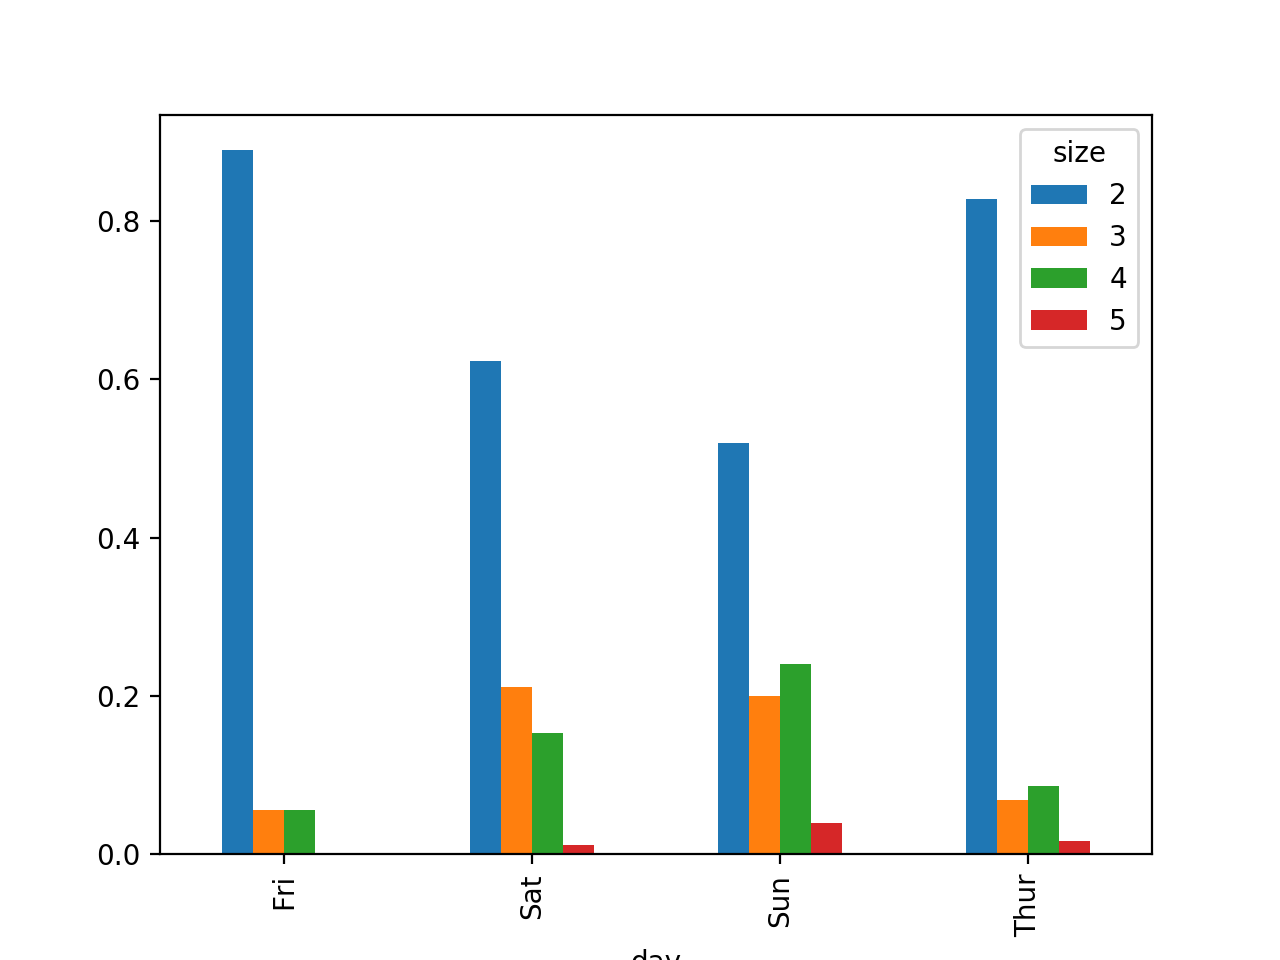

In [17]:
party_pcts.plot.bar()

In [18]:
tips['tip_pct'] = tips['tip']/ (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


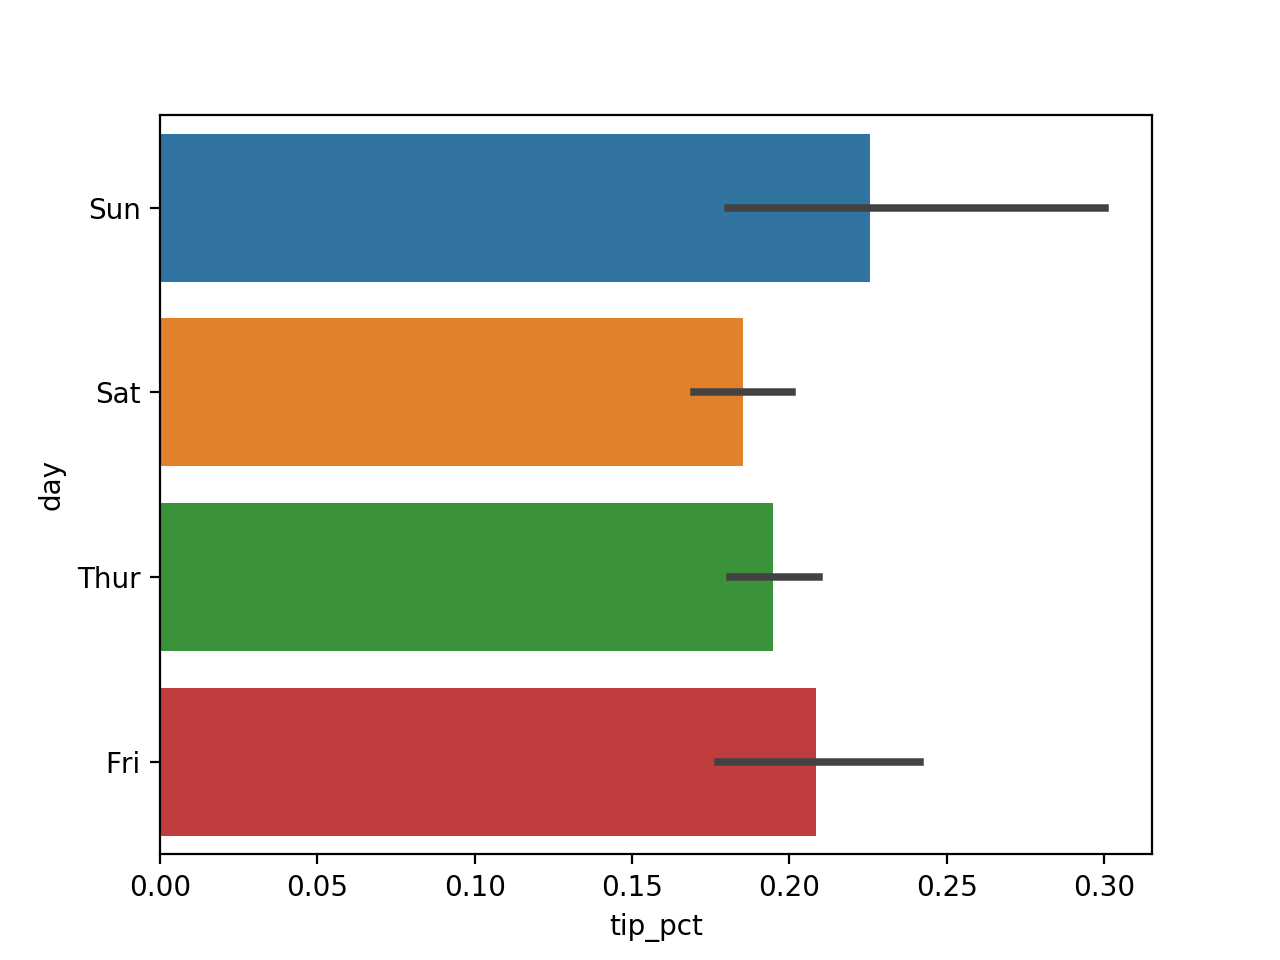

In [19]:
s_fig = plt.figure()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<IPython.core.display.Javascript object>


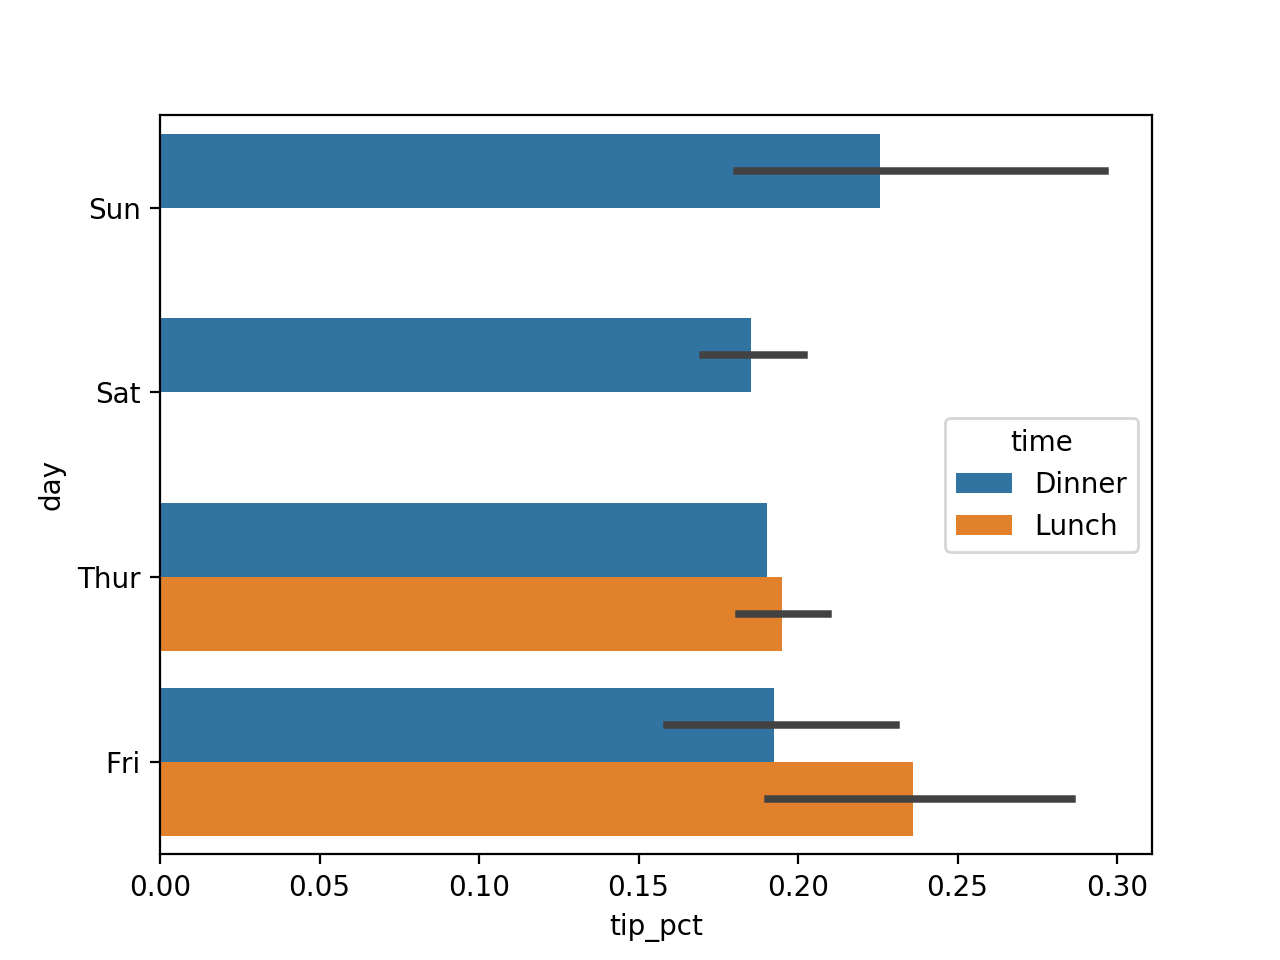

In [20]:
s_fig = plt.figure()
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [21]:
sns.set(style='whitegrid')

### Histograms and Density Plots

<IPython.core.display.Javascript object>


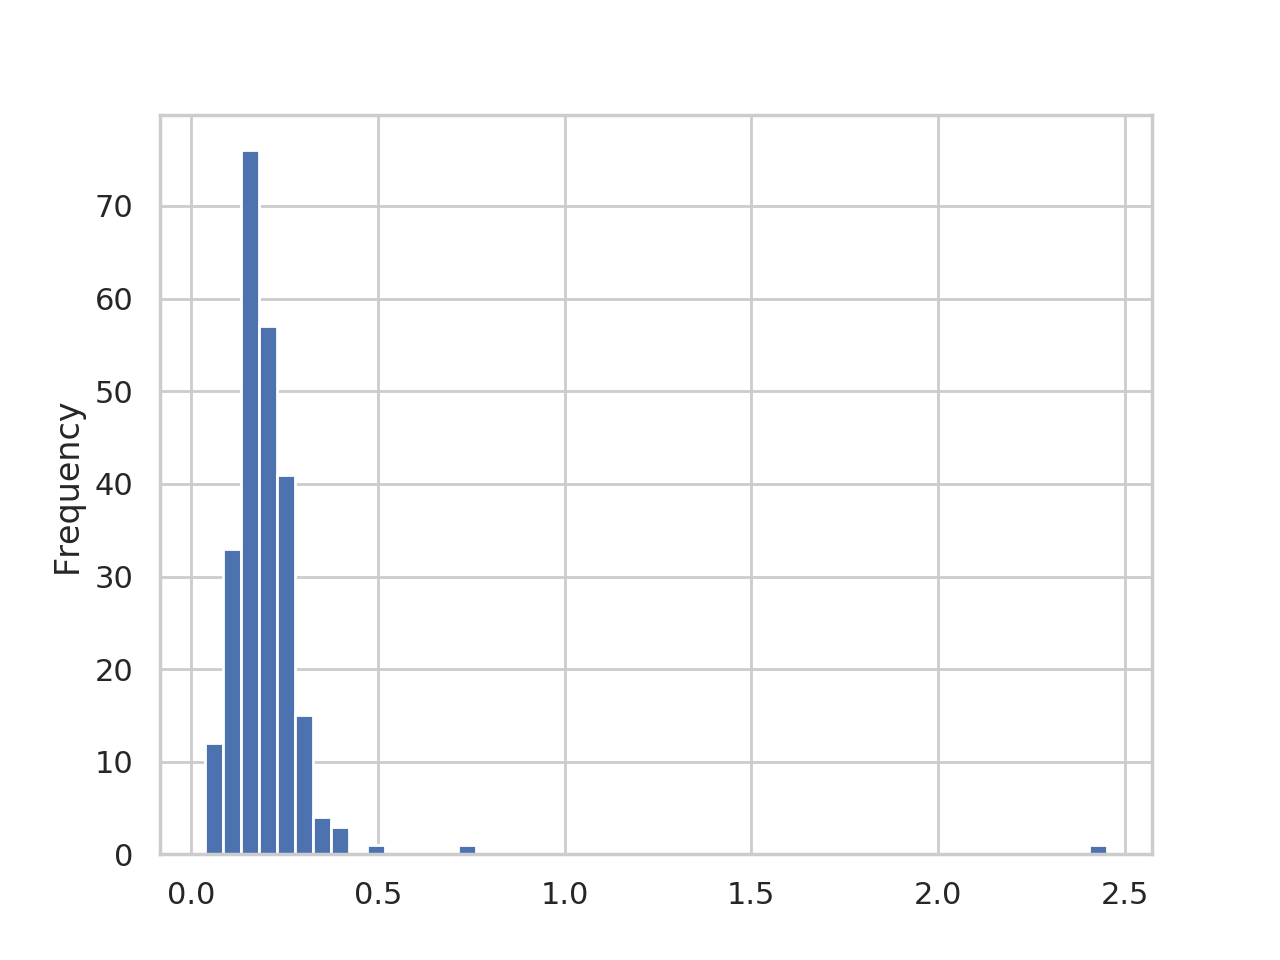

In [22]:
s_fig = plt.figure()
tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


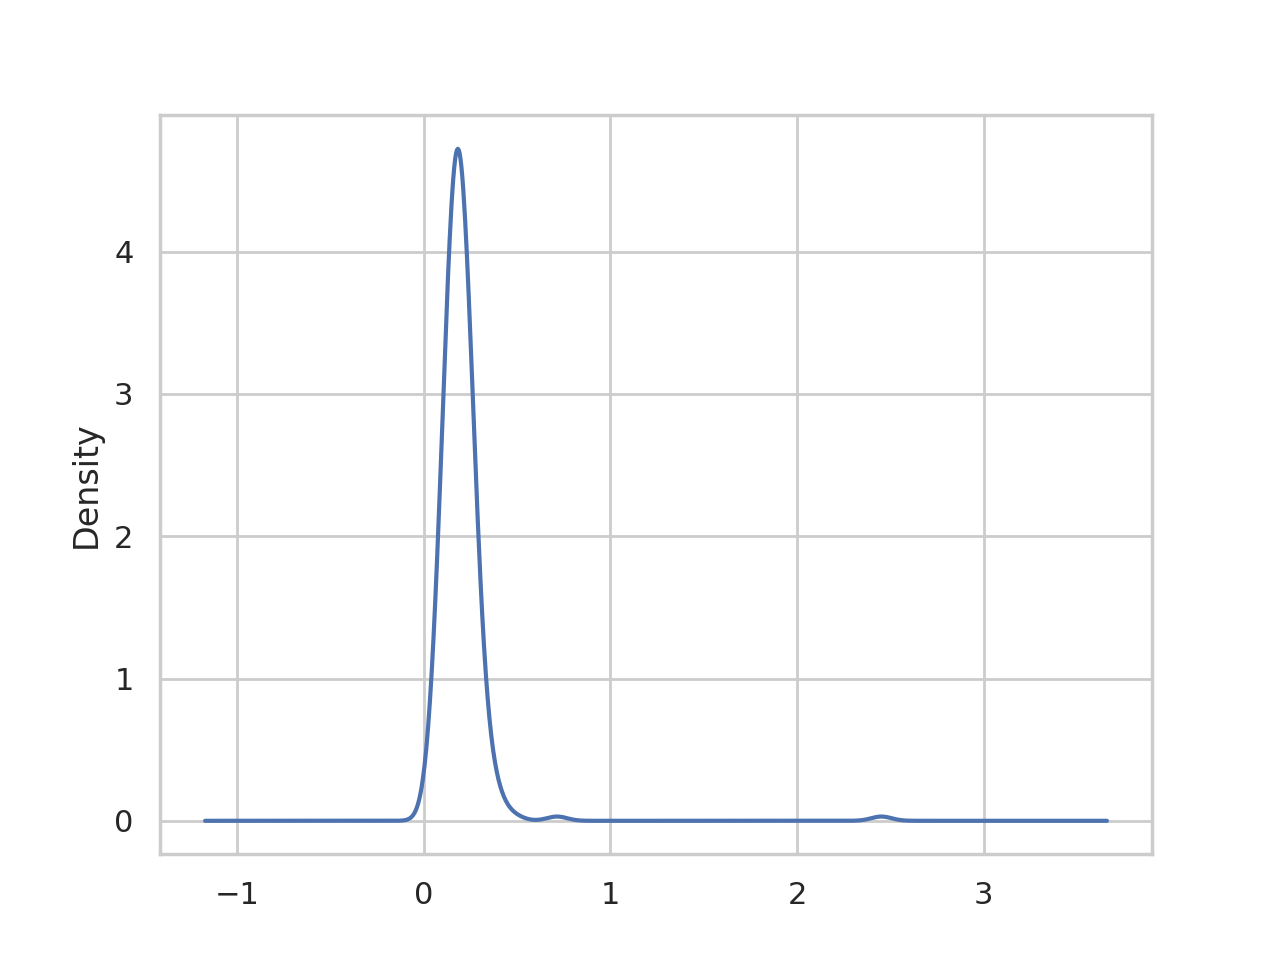

In [23]:
s_fig = plt.figure()
tips['tip_pct'].plot.density()

<IPython.core.display.Javascript object>


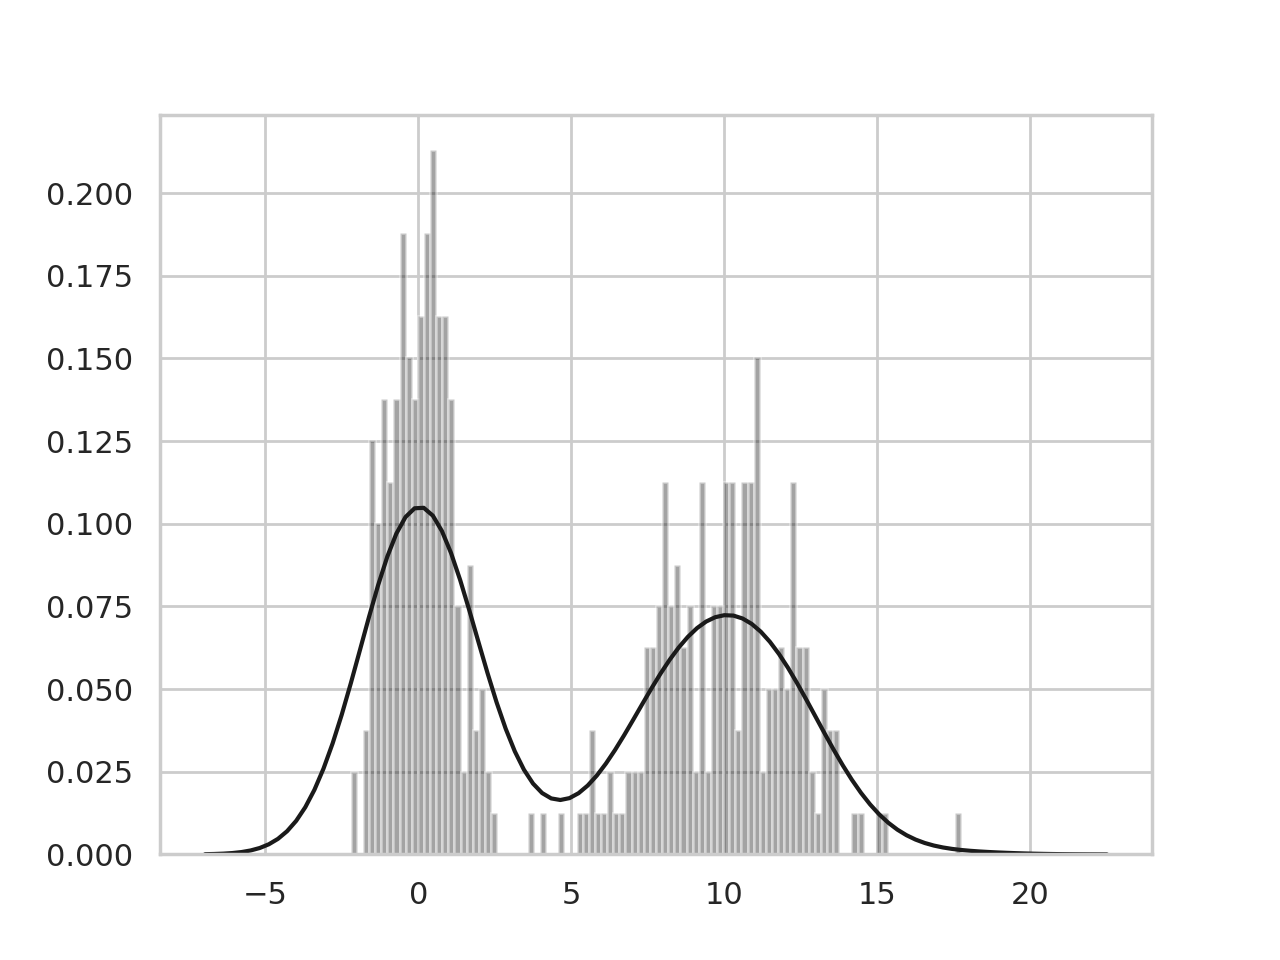

In [24]:
s_fig = plt.figure()

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [25]:
macro = pd.read_csv('../examples/macrodata.csv')

In [26]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [27]:
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<IPython.core.display.Javascript object>


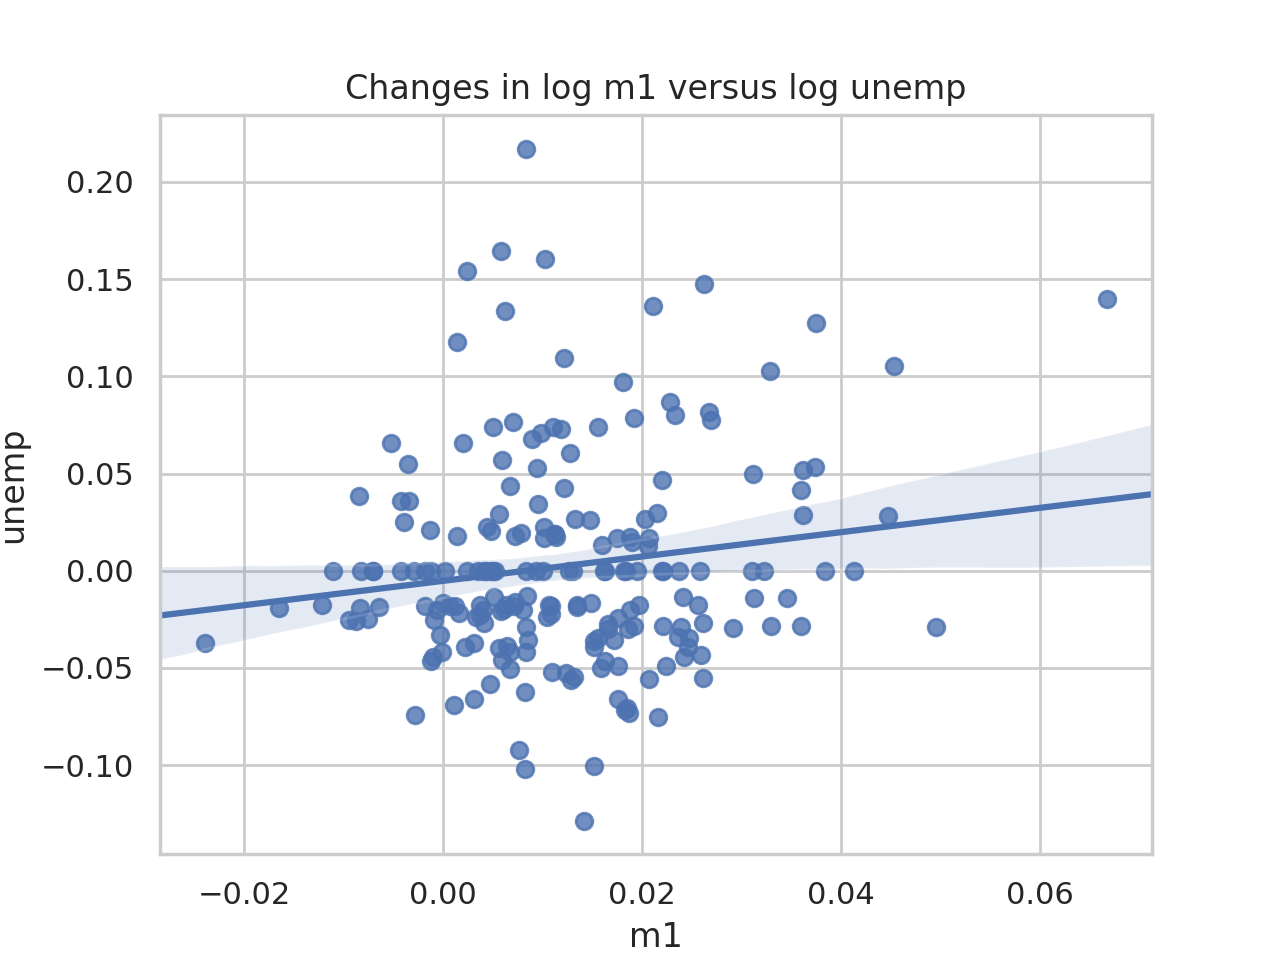

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In [28]:
s_fig = plt.figure()

sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

<IPython.core.display.Javascript object>


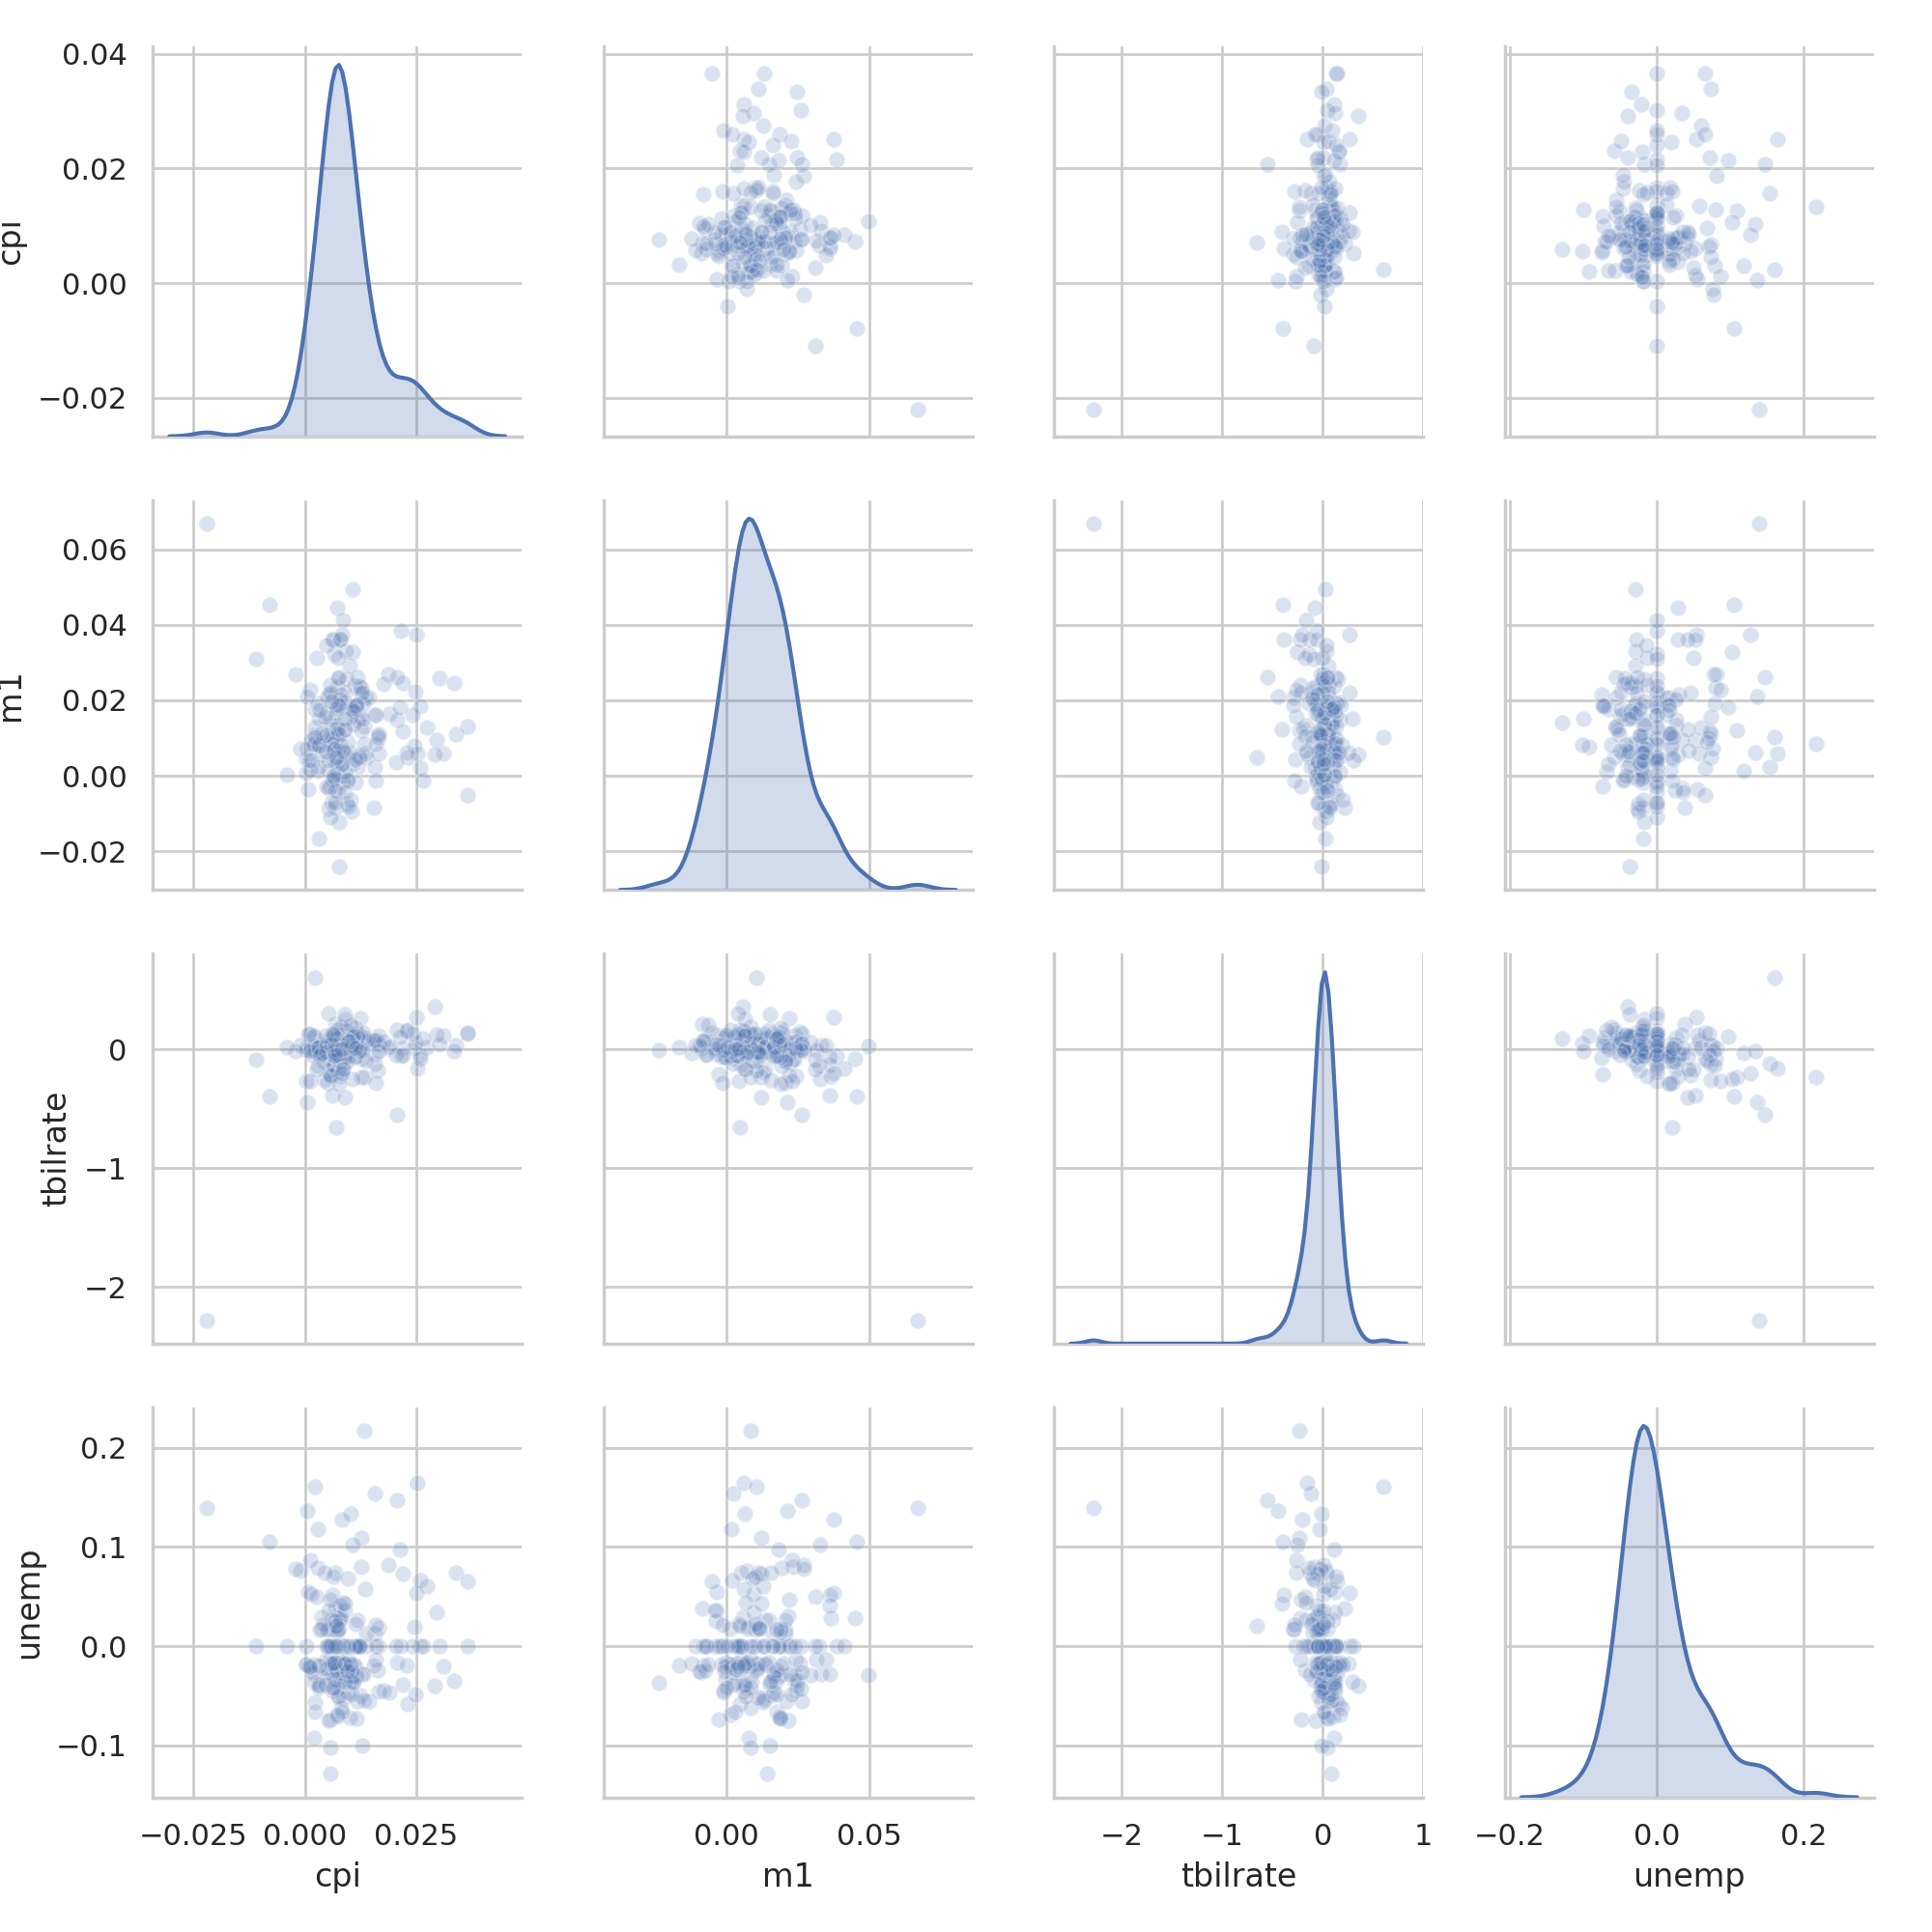

In [29]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

/home/nakxx/.local/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


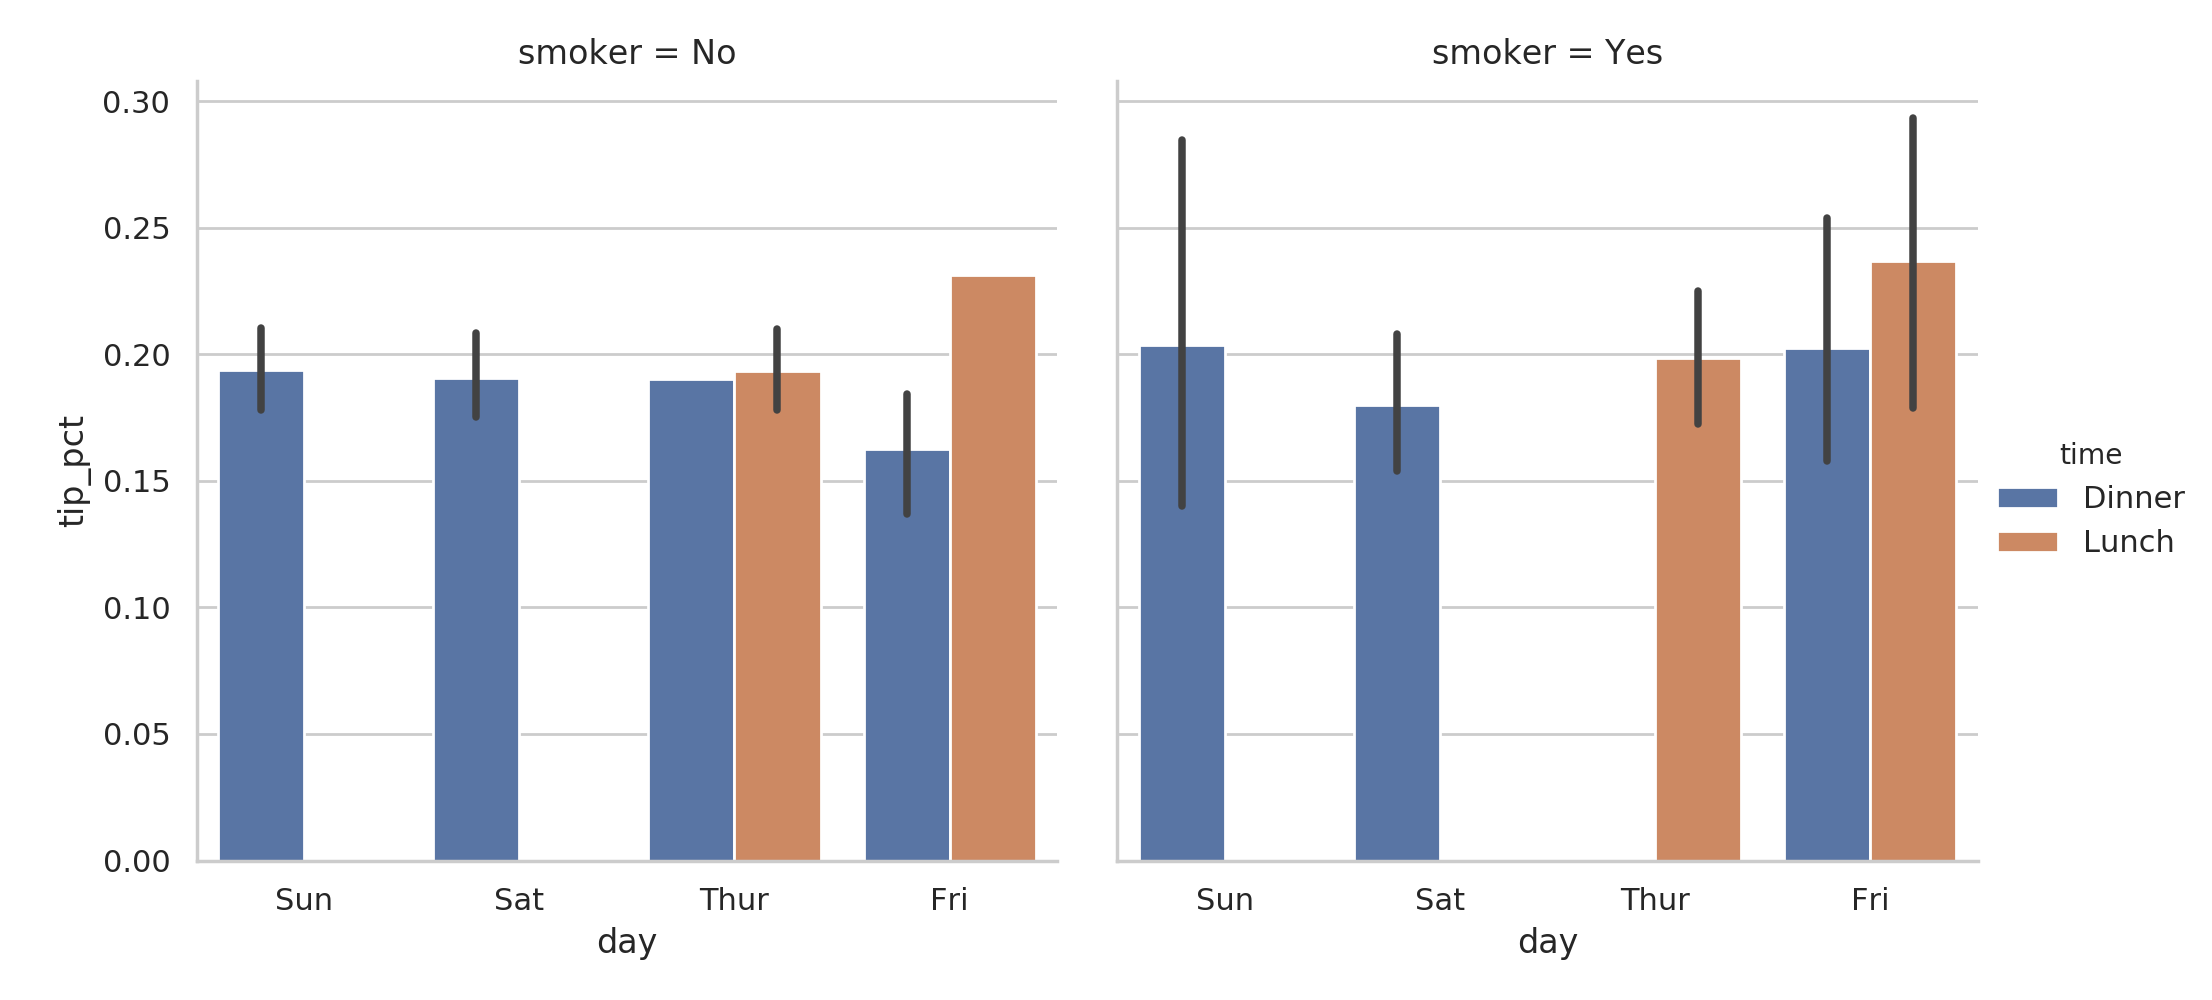

In [30]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


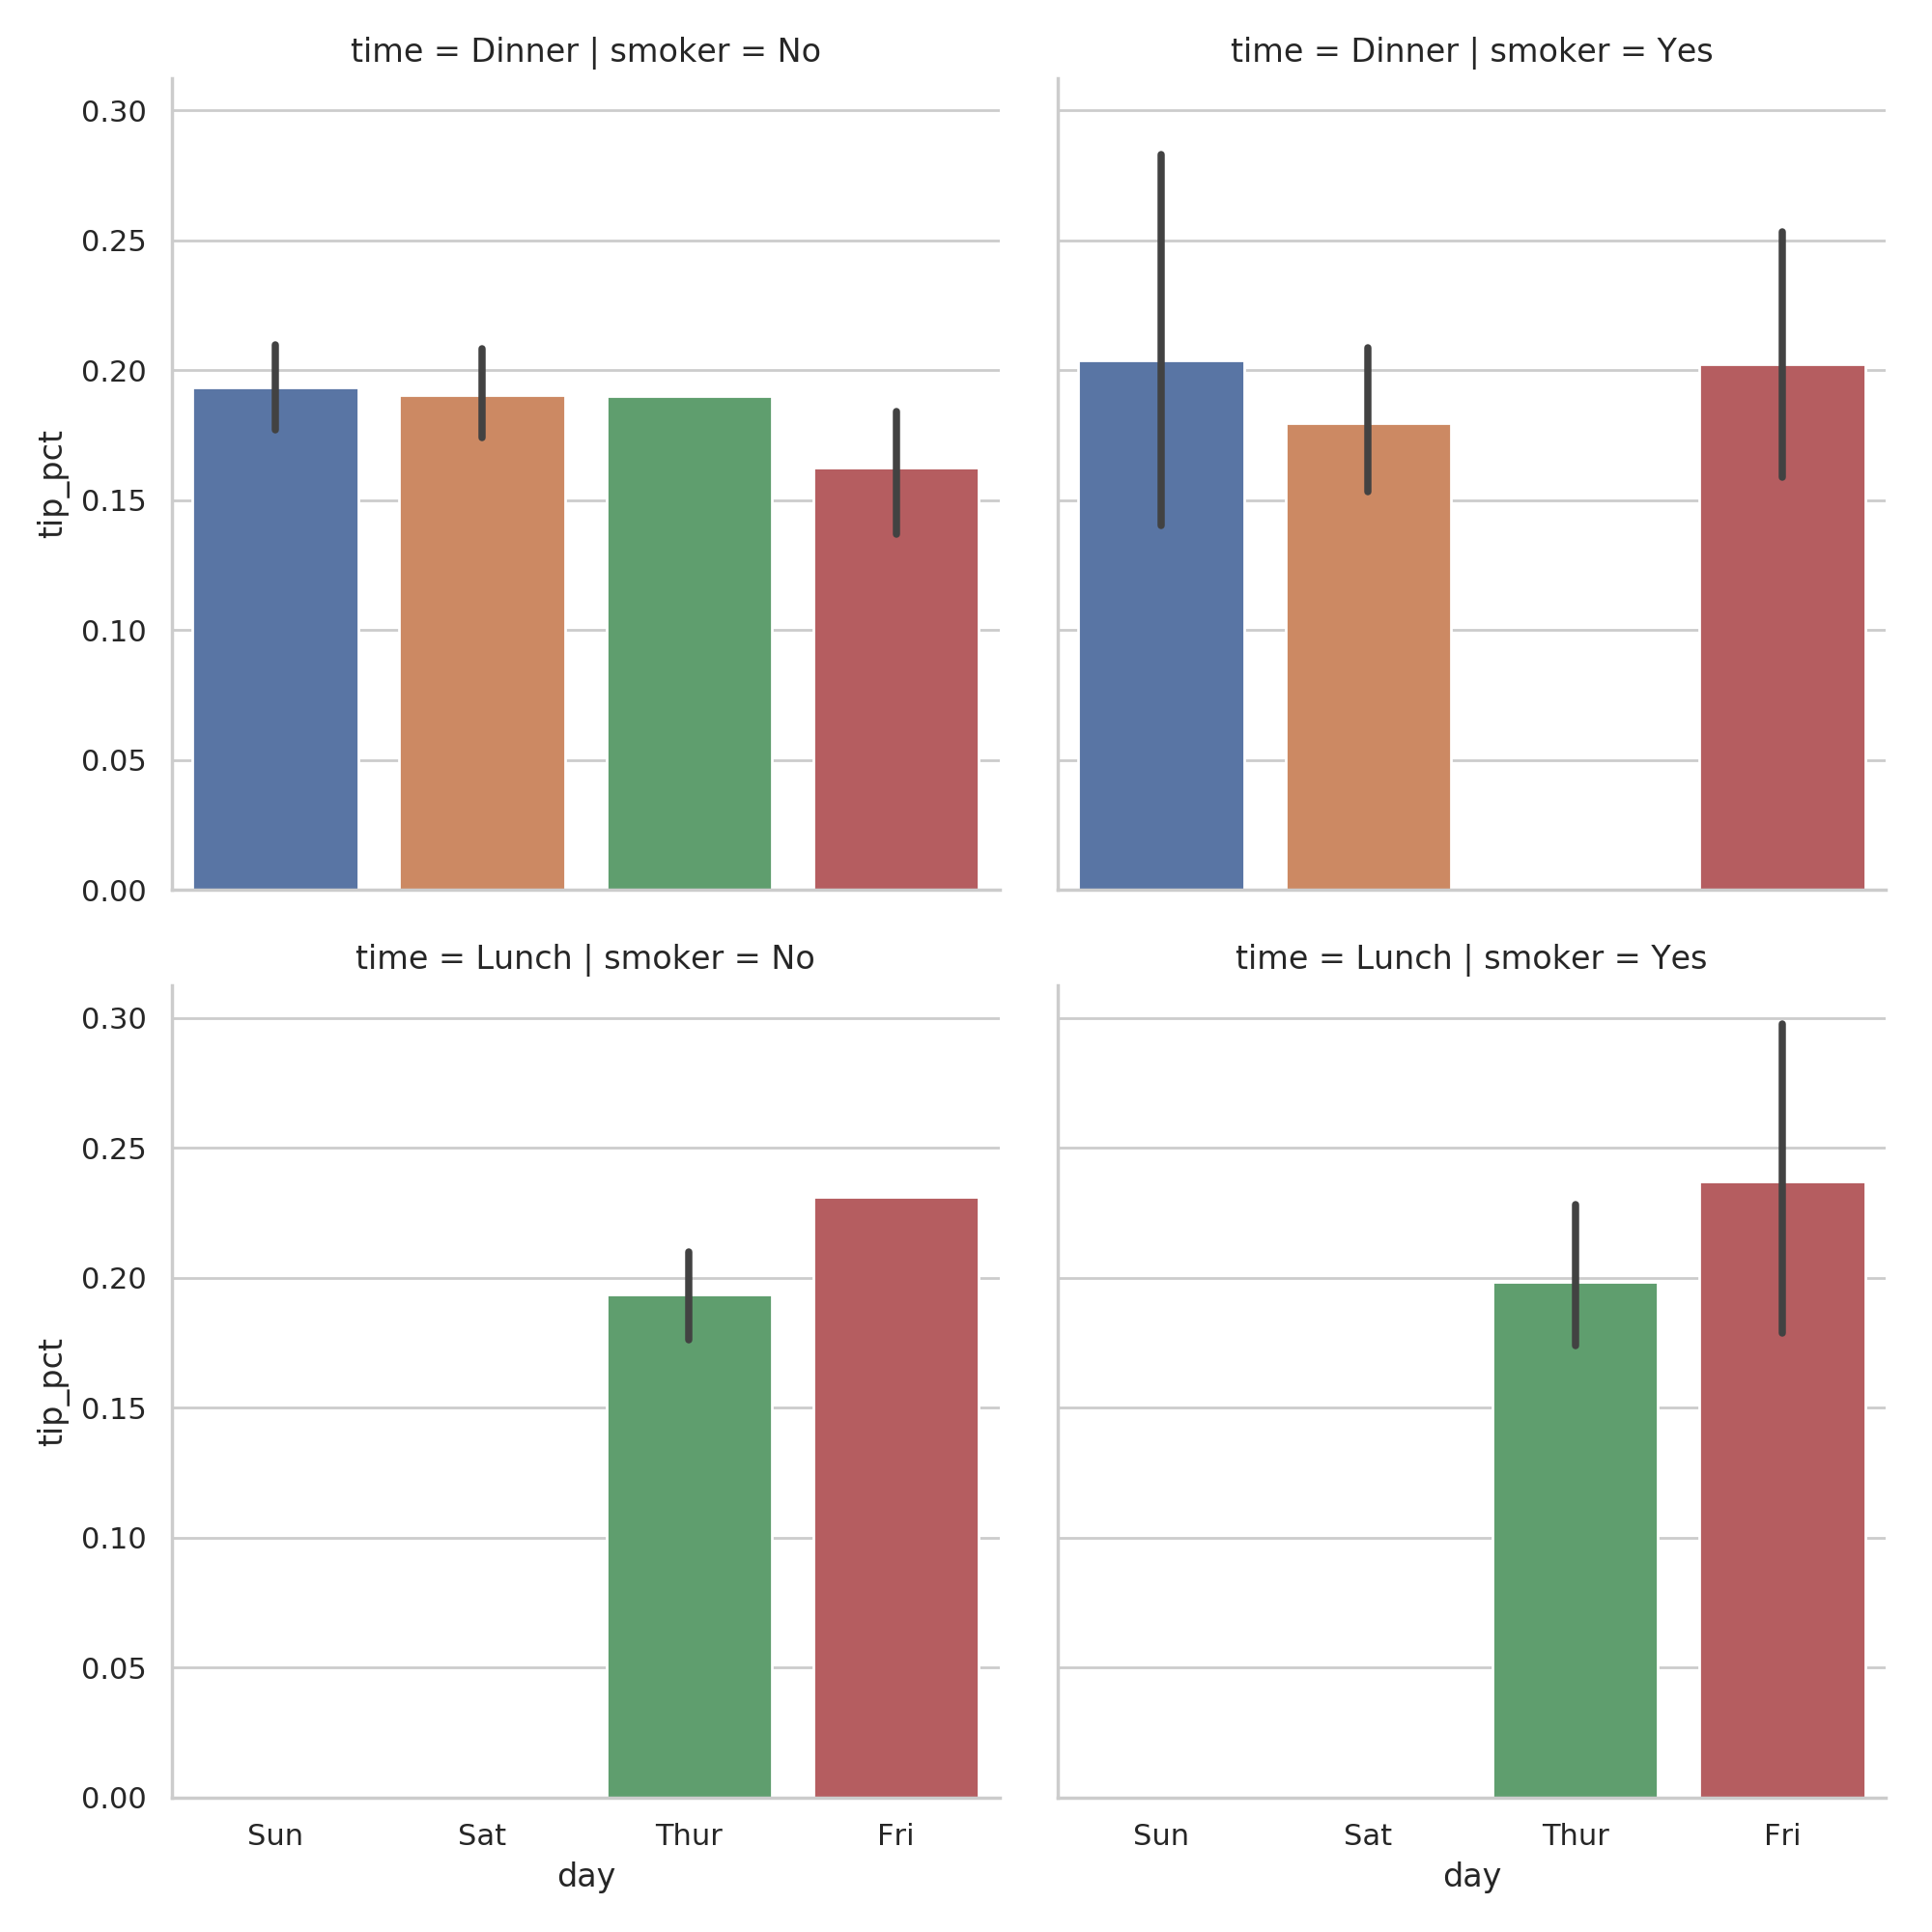

In [31]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


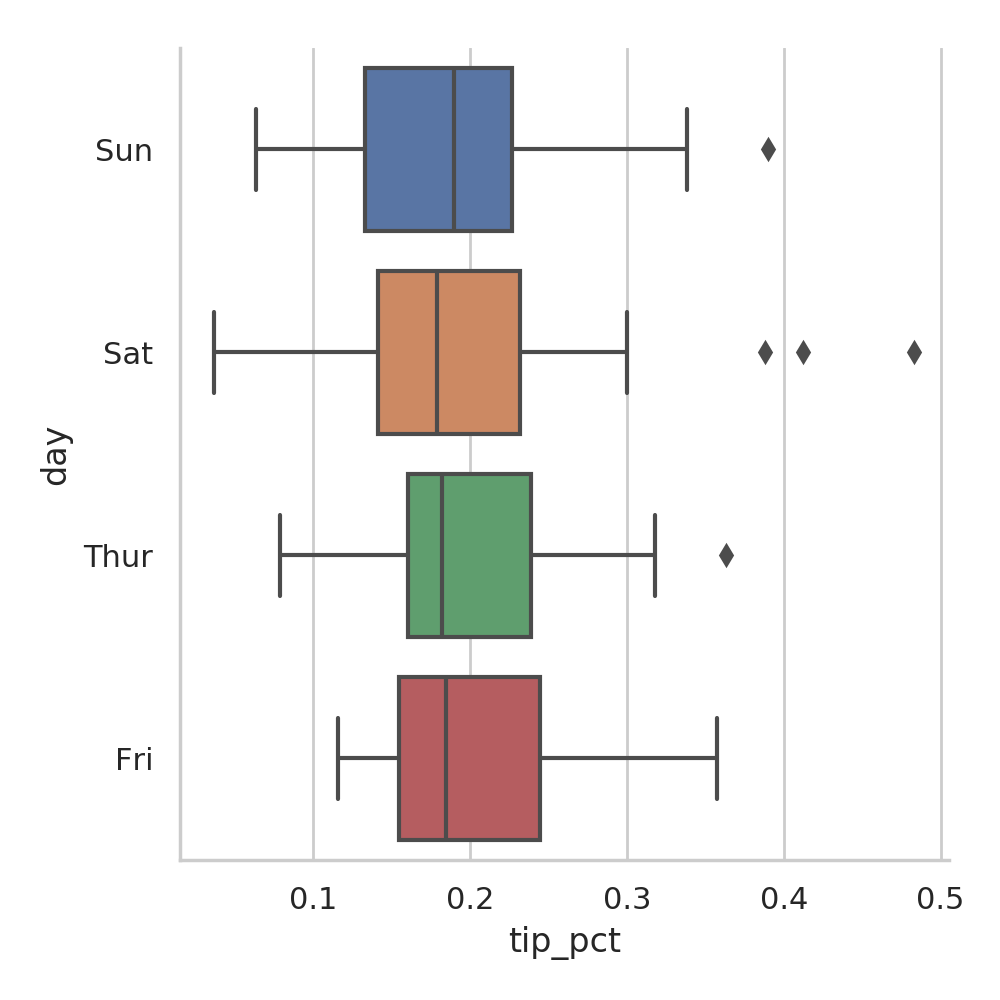

In [32]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])